In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Get project files
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
print(total_test)

51


In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir, 
                                                           target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                                           batch_size=batch_size, 
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir, 
                                                              target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                                              batch_size=batch_size, 
                                                              class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(directory=PATH, 
                                                         target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                                         batch_size=batch_size,
                                                         classes=['test'], 
                                                         class_mode='binary', 
                                                         shuffle=False)

51
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


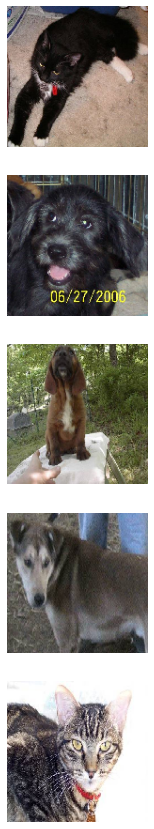

In [7]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           horizontal_flip=True, 
                                           vertical_flip=True, 
                                           rotation_range=20, 
                                           brightness_range=(0.2, 1.), 
                                           width_shift_range=0.2, 
                                           height_shift_range=0.2)

Found 2000 images belonging to 2 classes.


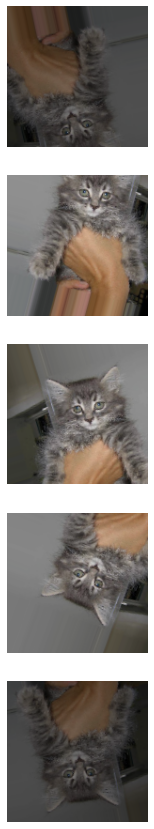

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [42]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               21233792  
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [50]:
train_data_gen[0][0].shape

(128, 150, 150, 3)

In [51]:
history = model.fit(train_data_gen, 
                    steps_per_epoch=16, 
                    epochs=epochs, 
                    validation_data=val_data_gen, 
                    validation_steps=8)

Epoch 1/15
16/16 [==============================] - 19s 1s/step - loss: 0.8101 - accuracy: 0.5130 - val_loss: 0.6794 - val_accuracy: 0.5940
Epoch 2/15
16/16 [==============================] - 17s 1s/step - loss: 0.6860 - accuracy: 0.5555 - val_loss: 0.6537 - val_accuracy: 0.5720
Epoch 3/15
16/16 [==============================] - 15s 926ms/step - loss: 0.6679 - accuracy: 0.5600 - val_loss: 0.6858 - val_accuracy: 0.5290
Epoch 4/15
16/16 [==============================] - 14s 867ms/step - loss: 0.6620 - accuracy: 0.5800 - val_loss: 0.6454 - val_accuracy: 0.6030
Epoch 5/15
16/16 [==============================] - 14s 859ms/step - loss: 0.6546 - accuracy: 0.6025 - val_loss: 0.6623 - val_accuracy: 0.6100
Epoch 6/15
16/16 [==============================] - 14s 844ms/step - loss: 0.6541 - accuracy: 0.6065 - val_loss: 0.6461 - val_accuracy: 0.6220
Epoch 7/15
16/16 [==============================] - 14s 910ms/step - loss: 0.6573 - accuracy: 0.6200 - val_loss: 0.6525 - val_accuracy: 0.6140
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


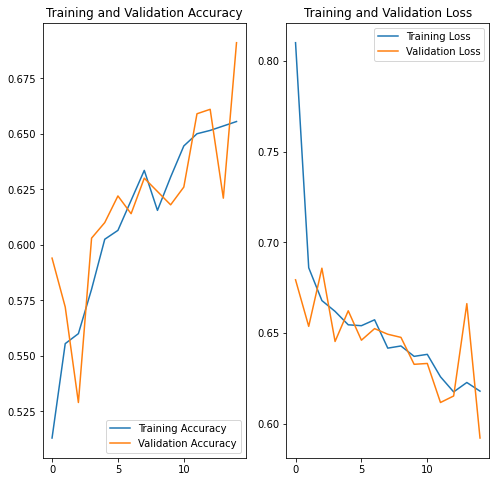

In [53]:
print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
probabilities = model.predict(test_data_gen).flatten()
print(probabilities)

[0.37358233 0.43976605 0.18933451 0.8261211  0.3267653  0.5413736
 0.47949207 0.41652265 0.6215087  0.982242   0.31342864 0.45395243
 0.5670324  0.3707431  0.5302228  0.6573621  0.63437814 0.7528285
 0.5124022  0.59794915 0.4478339  0.48832256 0.4325359  0.69082135
 0.39983737 0.36841527 0.95633596 0.46864873 0.41335687 0.49527153
 0.37353244 0.34106287 0.56128275 0.99996614 0.39815426 0.56604356
 0.99998057 0.7702409  0.40314174 0.40735525 0.5315929  0.4602227
 0.90169746 0.66133296 0.50342447 0.64494795 0.41322035 0.31451884
 0.3433896  0.4182022 ]


In [55]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

num = 0
string = ''
for probability, answer in zip(probabilities, answers):
    string += str((round(probability))) + ' '
    if num == 10:
        num = -1
        print(string)
        string = ''
    num += 1
    if round(probability) == answer:
        correct +=1
print(string)

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

0 0 0 1 0 1 0 0 1 1 0 
0 1 0 1 1 1 1 1 1 0 0 
0 1 0 0 1 0 0 0 0 0 1 
1 0 1 1 1 0 0 1 0 1 1 
1 1 0 0 0 0 
Your model correctly identified 0.74% of the images of cats and dogs.
You passed the challenge!
